# MANUPULATING DATASET and creating features

### USING BIGRAM LANGUAGE MODEL.

In [269]:
words = open('names.txt', 'r').read().splitlines()
# .splitlines convert the string into a list by a '\n'
words[:10]



['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [270]:
len(words)
# max(len(w) for w in words) == 15
# min(len(w) for w in words) == 2

32033

In [271]:
# example for making a dictionary of occurance of 2 conti. chars
b = {}  # dictionary of which charcter is likely to come after which character

for w in words:
    ch = ['<s>'] + list(w) + ['<e>']  # <s> denotes start of name  and <e> denotes the end of the name
    for ch1,ch2 in zip(ch, ch[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # counts the no. of times a charcter comes after another character
        # print(ch1, ch2)

# b.items()
sorted(b.items(), key = lambda kv: -kv[1])
# sort the dictionary in descending order

[(('n', '<e>'), 6763),
 (('a', '<e>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<e>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<e>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<e>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<e>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [272]:
import torch

In [273]:
# N = torch.zeros((28,28) , dtype=torch.int32)
# make a 2d zero array of 28x28 dimesions
# 26 aplhabets + <s> + <e> == 28 characters


# after having <s> and <e> same, the dimensions are 27x27
N = torch.zeros((28,28) , dtype=torch.int32)

In [274]:
chars = sorted(list(set(''.join(words))))
# stoi = {s:i for i,s in enumerate(chars)}
# adding <s> and <e> in stoi dictionary
# stoi['<s>'] = 26
# stoi['<e>'] = 27
# stoi

# making <s> and <e> same == '.'
stoi = {s : i + 1 for i,s  in enumerate(chars)}
stoi['.'] = 0


In [275]:
#  ineverting the stoi dict.
itos = {i : s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [276]:
for w in words:
    # ch = ['<s>'] + list(w) + ['<e>']
    ch = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

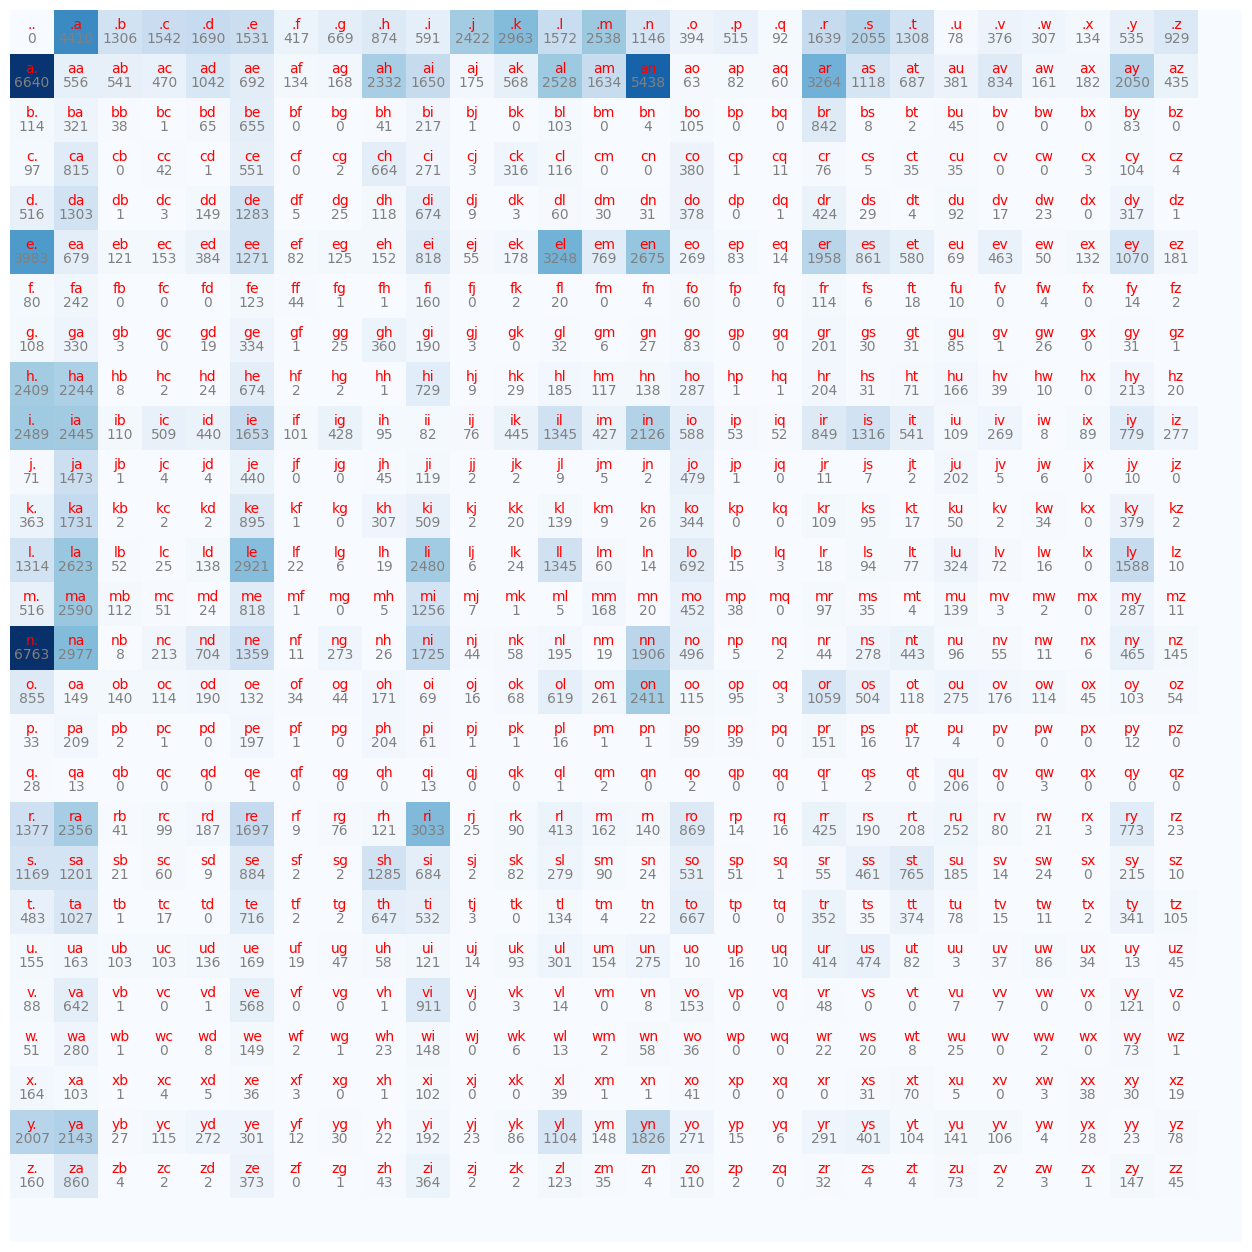

In [277]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
    for j in range(27):
        str = itos[i] + itos[j]
        plt.text(j , i, str, ha="center", va="bottom", color="red")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")
plt.axis('off')

### since the last line of the plot is zero as <'e'> is always at the last positon.
### also second last column is also zero as <'s'> is always at the first position.


In [278]:
# correcting the error by making <s> and <e> same == '.'

### Creating probability for one character to come after another character.

In [279]:
# creating a probabilty vector
p = N[0].float()
p = p / p.sum()
p
# now p.sum() == 1

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [280]:
g = torch.Generator().manual_seed(214748367)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.4207, 0.1810, 0.3983])

In [281]:
# multinomial returns a tensor of integers acc. to the probabilties given to it.
torch.multinomial(p, num_samples=10, replacement=True, generator=g)

tensor([0, 0, 2, 2, 0, 1, 0, 0, 2, 0])

### Using torch.multinomial we can predict the character to generate a name.

In [282]:
g = torch.Generator().manual_seed(214748367)
# predicting only one character at one item. => num_samples = 1
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
# to pop the number from the tensor list, we use .item()
itos[ix]


'b'

### Now, with the help of loop we predict the whole name.

In [283]:
g = torch.Generator().manual_seed(214748367) # using a seed will always give same name as a result.


for i in range(20):
    out = []
    ix = 0  # starting from index 0
    while True:
        p =N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # print(itos[ix])
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))


# result ---> 
    # viarilandayar.
    # d.
    # kelihisazarmeeryqusiyniles.
    # cosinaden.
    # le.
    # ee.
    # cavie.
    # ke.
    # somabenen.

viarilandayar.
d.
kelihisazarmeeryqusiyniles.
cosinaden.
le.
ee.
cavie.
ke.
somabenen.
y.
ti.
onen.
amiyma.
n.
jell.
ahorama.
ha.
alecerama.
figany.
gmhardan.


### Using uniform distribution for probability rather than taking N(x).

In [284]:
g = torch.Generator().manual_seed(214748367) # using a seed will always give same name as a result.


for i in range(20):
    out = []
    ix = 0  # starting from index 0
    while True:
        # p =N[ix].float()
        # p = p / p.sum()
        p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # print(itos[ix])
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))


# Result ---->
    # vfaorkhydfydr.
    # dnkxlihhpazvwwneumqjgfywkmxsmcfsygadeohlrgeexcrvthakmwsomxbopecqywtghovlyjqecumbgfxyxpzrxporgzvqhmbojgcqrzmy.
    # figxwyxgmhord.
    # sjbihclkwposgok.
    # sdlzehtgijqempszd.
    # nbstqpqjhxxqknzt.
    # zuhe.
    # ecyktu.

vfaorkhydfydr.
dnkxlihhpazvwwneumqjgfywkmxsmcfsygadeohlrgeexcrvthakmwsomxbopecqywtghovlyjqecumbgfxyxpzrxporgzvqhmbojgcqrzmy.
figxwyxgmhord.
sjbihclkwposgok.
sdlzehtgijqempszd.
nbstqpqjhxxqknzt.
zuhe.
ecyktu.
qhxqjjzakqyrumwd.
bzbugiedwsvvgfaqqluppbdbcluuemjwmtg.
adjcfnky.
wrb.
qzepvjkawpjrgrtkqioueqtpiocgrc.
ebozdl.
dvdzhlnwxiiadkstyguyyjjqegohdoctabskyp.
.
aeswawqqatjrcidrriskktaoatcqzqhpa.
spnfgrsbielfnzpcsfzuomxyhlghi.
jatqsdmehdfghmfugftwpefxbllcfzijkwhdtyvibshuzbwevnwmhkzuhozlf.
dmnxuatgiyintw.


### Making the code more efficient by converting the N matrix into a probability COlumn.

In [285]:
P = (N+1).float() # converting N into a float matrix
# adding 1 to N to make sure that none of the probability will be zero and will help in log likelihood
# P.shape() == [27,27]
# P.sum(0, keepdim == true)

In [286]:
P.sum(1, keepdim= True)
P.sum(1, keepdim=True).shape
# P.sum(1, keepdim= True) means sum along the row. and we will get only one column.
# P.sum(0, keepdim= True) means sum along the column. and we will get only one row.

torch.Size([28, 1])

In [287]:
P /= P.sum(1, keepdims=True)
# Now we have a probability column P.

In [288]:
# Using P[ix] as to make the code more efficient.
g = torch.Generator().manual_seed(214748367) # using a seed will always give same name as a result.


for i in range(10):
    out = []
    ix = 0  # starting from index 0
    while True:
        # p =N[ix].float()
        # p = p / p.sum()
        # p = torch.ones(27) / 27.0
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        # print(itos[ix])
        out.append(itos[ix])
        if ix == 0:
            break

    print(''.join(out))


viarilandayar.
d.
kelihisazarmeeryqusiyniles.
cosinaden.
le.
ee.
cavieake.
somabonen.
y.
ti.


### Evaluating the quality of the model by loss function

In [289]:
for w in words[:3]:
    ch = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1
        prob = P[ix1, ix2]
        logprob = torch.log(prob)  # using log(prob as the value for prob is very low.
        print(f"{ch1}{ch2} => {prob:.4f} => {logprob:.4f}")
        

        # the more the next char is likely the logprob is be lesser and lesser negative.
        # the less the next char is likely to come the prob is more negative.

.e => 0.0478 => -3.0411
em => 0.0377 => -3.2794
mm => 0.0253 => -3.6755
ma => 0.3885 => -0.9456
a. => 0.1958 => -1.6305
.o => 0.0123 => -4.3965
ol => 0.0779 => -2.5527
li => 0.1774 => -1.7294
iv => 0.0152 => -4.1845
vi => 0.3506 => -1.0480
ia => 0.1380 => -1.9807
a. => 0.1958 => -1.6305
.a => 0.1376 => -1.9835
av => 0.0246 => -3.7041
va => 0.2472 => -1.3975
a. => 0.1958 => -1.6305


#### GOAL :- to mazimize likelihood of the datat wrt model parameters.
#### equivalent to maximize the log likelihood
#### equivalent to minimize the negative log likelihood
#### equivalent to minimize the avg neagtive log likelihood

In [290]:
# using log likehood of the datat for the model
log_likelihood = 0.0
count = 0
for w in words[:3]:
    ch = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1
        prob = P[ix1, ix2]
        logprob = torch.log(prob)  # using log(prob as the value for prob is very low.
        log_likelihood += logprob  # log(a*b) == log(a) + log(b)
        count += 1
        # print(f"{ch1}{ch2} => {prob:.4f} => {logprob:.4f}")

# print(f"log_likelihood: {log_likelihood.item()}")
nll = -log_likelihood  # nll == negative log likelihood
avg_nll = nll / count
avg_nll

# the lower the avg_nll, the better off we are.
# the higer avg_nll is, the worse off we are.

tensor(2.4256)

In [291]:
# Using the loss fucntion on a single name
log_likelihood = 0.0
count = 0
for w in ["prakshaaqvervfqele"]:
    ch = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1
        prob = P[ix1, ix2]
        logprob = torch.log(prob)  
        log_likelihood += logprob 
        count += 1
        print(f"{ch1}{ch2} => {prob:.4f} => {logprob:.4f}")

nll = -log_likelihood
avg_nll = nll / count
avg_nll

# due to vf,fq and qv, the log_likelihood = -inf
# to tackle that we add some fake count in the data in order to smooth out the model.

.p => 0.0161 => -4.1293
pr => 0.1442 => -1.9365
ra => 0.1852 => -1.6864
ak => 0.0168 => -4.0877
ks => 0.0189 => -3.9664
sh => 0.1581 => -1.8445
ha => 0.2937 => -1.2252
aa => 0.0164 => -4.1090
aq => 0.0018 => -6.3207
qv => 0.0033 => -5.7038
ve => 0.2188 => -1.5198
er => 0.0958 => -2.3456
rv => 0.0064 => -5.0571
vf => 0.0004 => -7.8637
fq => 0.0011 => -6.8384
qe => 0.0067 => -5.0106
el => 0.1589 => -1.8397
le => 0.2089 => -1.5658
e. => 0.1948 => -1.6357


tensor(3.6150)

# USING NEURAL NETWIRK MODEL TO ACHEIVE SIMILAR RESULTS

In [292]:
# create the training set of all the bigrams.
xs, ys = [], []  # contains labels of the characters.

for w in words[:1]:
    ch = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [293]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()

# xs.shape == [5]
# xenc.shape == [5,27]
# F.one_hot function encodes the integers into vectors.
# means it stores label '5' at 5th index of the vector.
# this vectors are noe can be feeded to neurons.
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

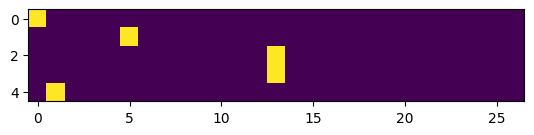

In [294]:
plt.imshow(xenc)

In [295]:
# randomly assigning weights for 27 neurons
g = torch.Generator().manual_seed(2147483647)  
w = torch.randn((27,27), generator=g) # creating a vector of shape [27,27]
xenc@w
# [5,27] @ [27,27] ---> [5,27]

tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
         -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01,
         -4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
          2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01,
          9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
          2.4968e+00,  2.4448e+00],
        [ 4.7236e-01,  1.4830e+00,  3.1748e-01,  1.0588e+00,  2.3982e+00,
          4.6827e-01, -6.5650e-01,  6.1662e-01, -6.2197e-01,  5.1007e-01,
          1.3563e+00,  2.3445e-01, -4.5585e-01, -1.3132e-03, -5.1161e-01,
          5.5570e-01,  4.7458e-01, -1.3867e+00,  1.6229e+00,  1.7197e-01,
          9.8846e-01,  5.0657e-01,  1.0198e+00, -1.9062e+00, -4.2753e-01,
         -2.1259e+00,  9.6041e-01],
        [ 1.9359e-01,  1.0532e+00,  6.3393e-01,  2.5786e-01,  9.6408e-01,
         -2.4855e-01,  2.4756e-02, -3.0404e-02,  1.5622e+00, -4.4852e-01,
         -1.2345e+00,  1.1220e+00, -6.73

In [296]:
(xenc @ w)[3,13]
# gives output of 13th neuron looking at the 3rd input

tensor(0.0379)

In [297]:
logits = (xenc @ w)  # log-counts
counts = logits.exp()
prob = counts / counts.sum(1,keepdim=True) # softmax function

# prob.shape == [5,27]
# prob[0].sum() == 1

In [298]:
prob[0]



tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])

### OPTIMIZATION

In [299]:
xs

tensor([ 0,  5, 13, 13,  1])

In [300]:
ys

tensor([ 5, 13, 13,  1,  0])

In [301]:
g = torch.Generator().manual_seed(2147483647)  
w = torch.randn((27,27), generator=g, requires_grad=True)

In [302]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one hot encoding
logits = xenc @ w  # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum() # probabilities of next characters (softmax function)
loss = -probs[torch.arange(5), ys].log().mean() # negative log likelihood

In [303]:
# backward pass
w.grad = None # setting the grads to zero
loss.backward()

In [304]:
# update
w.data += -0.1 * w.grad  # epsilon == 0.1

# OPTIMIZATION FOR WHOLE DATASET

In [305]:
# CREATING THE DATASET 
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        xs.append(ix1)
        ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples in the dataset: ", num)

# intialize the 'network'
g = g = torch.Generator().manual_seed(2147483647)  
w = torch.randn((27,27), generator=g, requires_grad=True)


number of examples in the dataset:  5


In [306]:
# gradient descent
for k in range(10):   # no. of iterations == 10


    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one hot encoding
    logits = xenc @ w  # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdim=True) # probabilities of next characters (softmax function)
    loss = -probs[torch.arange(5), ys].log().mean() + 0.01 * (w**2).mean() # negative log likelihood with regularization term
    print(loss.item())

    #backward pass
    w.grad = None # setting the gradients to zero
    loss.backward() # backpropogating into the graph

    # update
    w.data += -10 * w.grad  # epsilon == 10

3.778970241546631
1.9412192106246948
0.882522463798523
0.5524815917015076
0.4548908472061157
0.4103560745716095
0.38484615087509155
0.3682980239391327
0.35668912529945374
0.34809380769729614


In [307]:
# sampling the neural net model
for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one hot encoding
        logits = xenc @ w  # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        # probs = counts / counts.sum() # probabilities of next characters (softmax function)
        p = counts/ counts.sum(1, keepdim=True)
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))



RuntimeError: a Tensor with 5 elements cannot be converted to Scalar